#Spam Mail Detection


Problem Understanding

The dataset contains two columns:

*   label: ham (not spam) or spam.
*   text: The content of the SMS text.

Goal is to classify text into spam or ham using machine learning.

###Import Necessary Libraries

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Text processing
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Handling imbalance
from imblearn.over_sampling import SMOTE

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


###Load the Dataset

In [4]:
# Load the dataset
data = pd.read_csv("/content/spam.csv", encoding='latin-1')

In [5]:
# Print the first 5 rows to understand the dataset structure
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [6]:
# Display the number of rows and columns
print(data.shape)

(5572, 5)


In [7]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [8]:
# Print column names to verify their exact names
print(data.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


###Cleaning the Dataset

Remove unnecessary columns.

Rename columns for clarity (label, text).

Encode labels:
Assign 0 for ham and 1 for spam.

Check for and handle missing values if present.

Remove duplicates

In [9]:
# Drop unnecessary columns
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [10]:
# Rename columns for clarity
data.columns = ["label", "text"]

In [11]:
# Convert labels to numeric (0 = Ham, 1 = Spam)
data["label"] = data["label"].map({"ham": 0, "spam": 1})

In [12]:
# Display the cleaned data
print(data.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [13]:
# Check for duplicates
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display duplicate rows, if any
print(duplicate_rows)

Number of duplicate rows: 403
      label                                               text
102       0  As per your request 'Melle Melle (Oru Minnamin...
153       0  As per your request 'Melle Melle (Oru Minnamin...
206       0  As I entered my cabin my PA said, '' Happy B'd...
222       0                             Sorry, I'll call later
325       0                   No calls..messages..missed calls
...     ...                                                ...
5524      1  You are awarded a SiPix Digital Camera! call 0...
5535      0  I know you are thinkin malaria. But relax, chi...
5539      0                         Just sleeping..and surfing
5553      0                        Hahaha..use your brain dear
5558      0                             Sorry, I'll call later

[403 rows x 2 columns]


In [14]:
# Remove duplicate rows
data = data.drop_duplicates()

# Verify that duplicates are removed
print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")
print(f"Dataset size after duplicates removed: {data.shape}")


Number of duplicate rows after removal: 0
Dataset size after duplicates removed: (5169, 2)


In [15]:
# Reset index after removing duplicates
data = data.reset_index(drop=True)

###Exploratory Data Analysis (EDA)

Distribution of Labels

<ipython-input-16-6cb45bd6614c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set2')


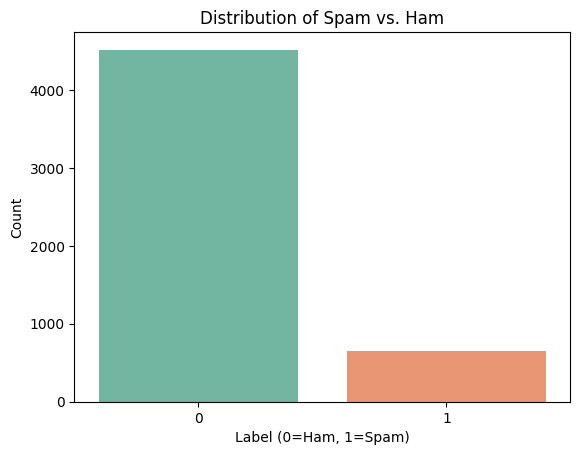

In [16]:
# Visualize the distribution of spam vs. ham
sns.countplot(x='label', data=data, palette='Set2')
plt.title('Distribution of Spam vs. Ham')
plt.xlabel('Label (0=Ham, 1=Spam)')
plt.ylabel('Count')
plt.show()

A count plot shows the distribution of spam (1) and ham (0) messages to identify any imbalance.

Word Count Analysis

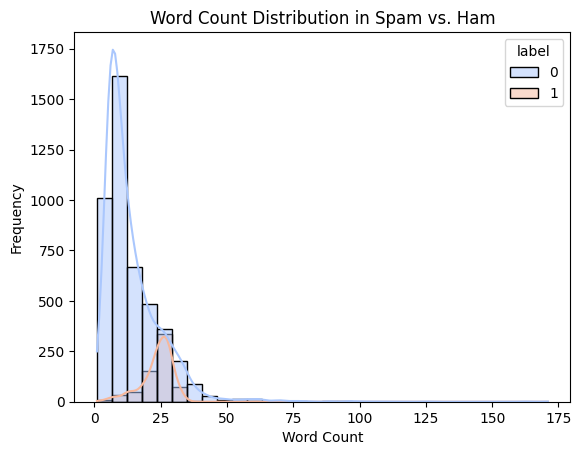

In [17]:
# Add a word count column
data['word_count'] = data['text'].apply(lambda x: len(x.split()))

# Plot word count distribution
sns.histplot(data=data, x='word_count', hue='label', kde=True, bins=30, palette='coolwarm')
plt.title('Word Count Distribution in Spam vs. Ham')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


Word Cloud for Spam Messages

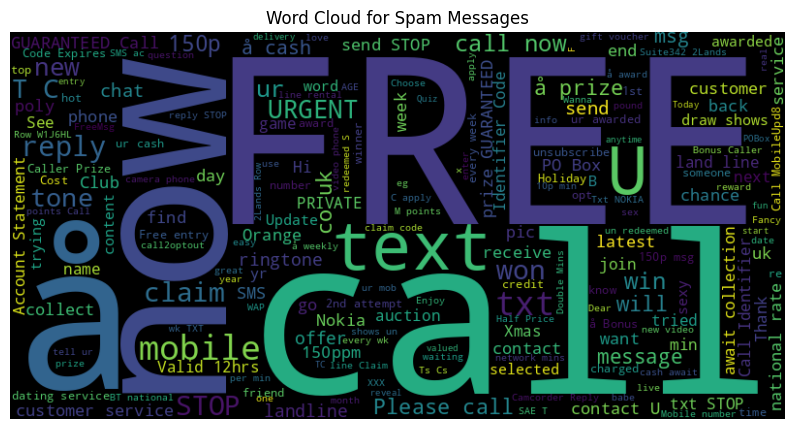

In [18]:
from wordcloud import WordCloud

# Generate a word cloud for spam messages
spam_words = ' '.join(data[data['label'] == 1]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()


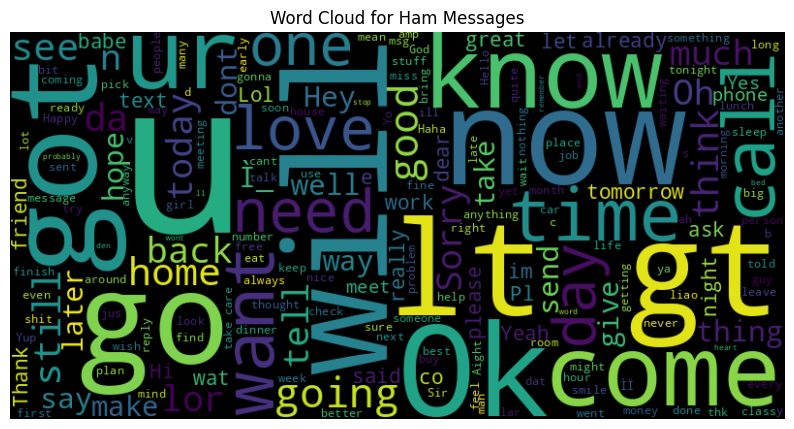

In [19]:
# Generate a word cloud for ham messages
ham_words = ' '.join(data[data['label'] == 0]['text'])
wordcloud_ham = WordCloud(width=800, height=400, background_color='black').generate(ham_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


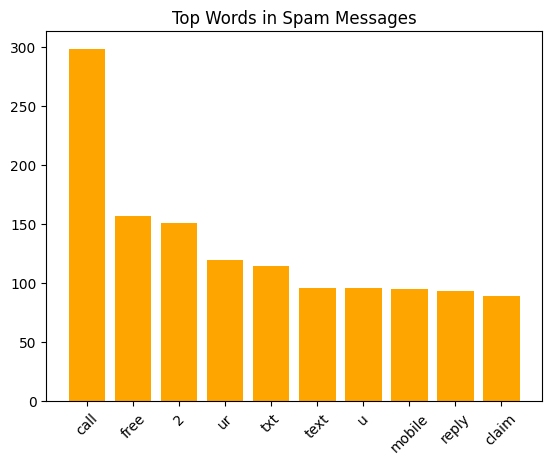

In [20]:
import nltk
nltk.download('stopwords')

from collections import Counter
from nltk.corpus import stopwords

# Get top words
stop_words = set(stopwords.words('english'))
spam_words = ' '.join(data[data['label'] == 1]['text']).lower().split()
spam_words = [word for word in spam_words if word not in stop_words]

top_spam_words = Counter(spam_words).most_common(10)
words, counts = zip(*top_spam_words)

plt.bar(words, counts, color='orange')
plt.title('Top Words in Spam Messages')
plt.xticks(rotation=45)
plt.show()

###Text Preprocessing

In [21]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download("stopwords")
nltk.download("wordnet")

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define text cleaning function
def clean_text(text):
    # Remove punctuation and lowercase the text
    text = re.sub(f"[{string.punctuation}]", "", text.lower())
    # Remove stopwords and lemmatize words
    return " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

# Apply text cleaning
data['cleaned_text'] = data['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


###Feature Extraction and Train-Test Split

Use TF-IDF (Term Frequency-Inverse Document Frequency) to convert text data into numerical features.

Limit the number of features (e.g., max_features=3000) to reduce dimensionality.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize cleaned text using TF-IDF
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['cleaned_text']).toarray()
y = data['label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###Handling Class Imbalance Using SMOTE

Use techniques like SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset.
Ensure resampled training data has equal distribution of spam and ham messages.

In [23]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display class distribution before and after resampling
print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_train_resampled)}")


Original class distribution: Counter({0: 3627, 1: 508})
Resampled class distribution: Counter({0: 3627, 1: 3627})


###Model Training and Evaluation

Naive Bayes Model

In [24]:
# Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [25]:
# Make predictions
nb_pred = nb_model.predict(X_test)

In [26]:
# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred, target_names=['Ham', 'Spam']))

Naive Bayes Accuracy: 0.9642166344294004
              precision    recall  f1-score   support

         Ham       0.99      0.97      0.98       889
        Spam       0.84      0.92      0.88       145

    accuracy                           0.96      1034
   macro avg       0.91      0.95      0.93      1034
weighted avg       0.97      0.96      0.96      1034



###Hyperparameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV


# Define the base model
nb_model = MultinomialNB()

# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid,
    scoring='accuracy',  # Optimize for accuracy
    cv=5,                # 5-fold cross-validation
    verbose=1            # Show progress
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'alpha': 0.1}
Best Cross-Validated Accuracy: 0.9823458282950425


###Evaluate the Tuned Model

In [35]:
# Get the best estimator from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
tuned_nb_pred = best_model.predict(X_test)

# Evaluate the tuned model
print("Tuned Naive Bayes Accuracy:", accuracy_score(y_test, tuned_nb_pred))
print(classification_report(y_test, tuned_nb_pred, target_names=['Ham', 'Spam']))


Tuned Naive Bayes Accuracy: 0.97678916827853
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       889
        Spam       0.95      0.88      0.91       145

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



High Accuracy:

A near-perfect accuracy of 97.68% indicates that the model performs very well overall.

Precision (Spam = 95%):

Precision is high, meaning most of the messages predicted as Spam are indeed Spam.

The low false positive rate minimizes the risk of legitimate messages being flagged as Spam.

Recall (Spam = 88%):

Recall is slightly lower, suggesting that some Spam messages are misclassified as Ham (false negatives).

While this is a trade-off, it’s acceptable depending on the use case.

F1-Score (Spam = 91%):

The harmonic mean of precision and recall shows a good balance, indicating the model is both precise and robust.

Class Imbalance:

The Ham class dominates the dataset with 889 instances, while the Spam class has only 145 instances.

Despite this imbalance, the model maintains good performance.

###Compare Before and After Tuning

In [36]:
#Comparison
initial_accuracy = accuracy_score(y_test, nb_pred)
tuned_accuracy = accuracy_score(y_test, tuned_nb_pred)

print(f"Initial Accuracy: {initial_accuracy:.4f}")
print(f"Tuned Accuracy: {tuned_accuracy:.4f}")


Initial Accuracy: 0.9642
Tuned Accuracy: 0.9768


The tuned model achieves 2.25% higher accuracy, reflecting better handling of both "Ham" and "Spam" messages.

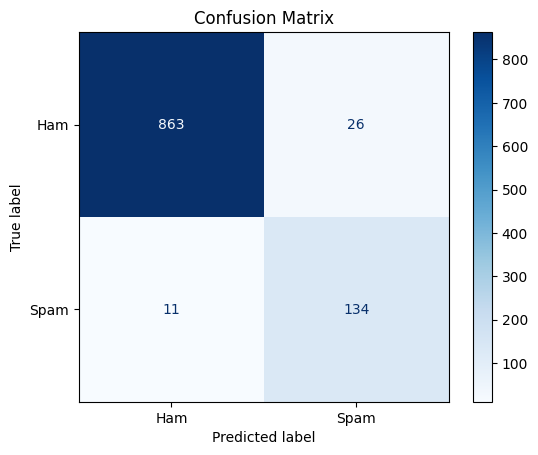

In [37]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, nb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

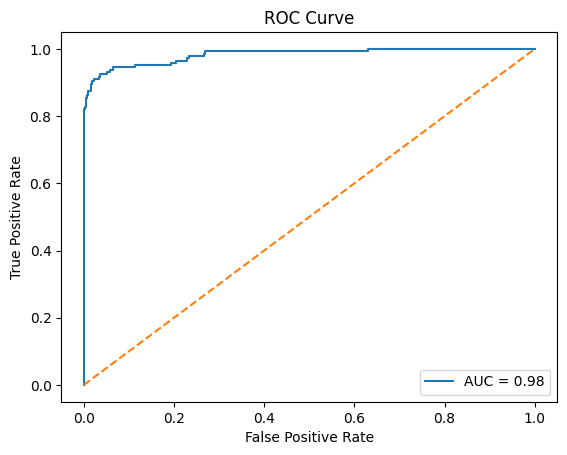

In [39]:
#ROC-AUC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have X_train and y_train for training data
nb_model.fit(X_train, y_train)

# Predict probabilities for ROC
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


An AUC of 0.98 indicates that your model is very effective at classifying Spam and Ham, with a low risk of misclassification.

Predict with Unknown Data

In [40]:
# Example new message (unknown data)
new_message = ["Congratulations! You've won a $1000 gift card. Click here to claim it."]

# Clean the new message (use the same cleaning function as before)
new_message_cleaned = [clean_text(msg) for msg in new_message]

# Transform the new message using the TF-IDF vectorizer
new_message_tfidf = tfidf.transform(new_message_cleaned).toarray()

# Predict the label (0 = Ham, 1 = Spam) for the new message
prediction = nb_model.predict(new_message_tfidf)

# Print the result
if prediction == 1:
    print("The message is Spam.")
else:
    print("The message is Ham.")


The message is Spam.
